# Chapter 2: Distributions

## Reading

In [1]:
import numpy as np

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [4]:
import thinkplot

In [13]:
import thinkstats2

Download pregnancy datasets.

In [5]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [6]:
import nsfg

In [7]:
df_preg = nsfg.ReadFemPreg()

In [9]:
df_preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [10]:
df_live = df_preg.loc[df_preg['outcome'] == 1]

In [11]:
df_live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


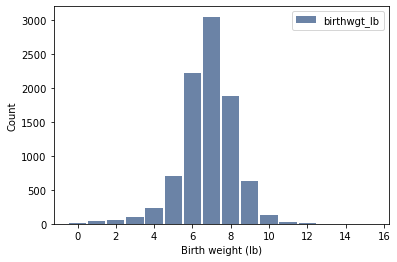

In [14]:
hist = thinkstats2.Hist(df_live['birthwgt_lb'], label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (lb)", ylabel="Count")

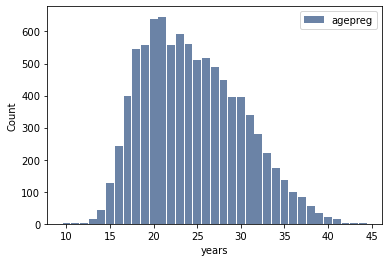

In [15]:
ages = np.floor(df_live['agepreg'])
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="years", ylabel="Count")

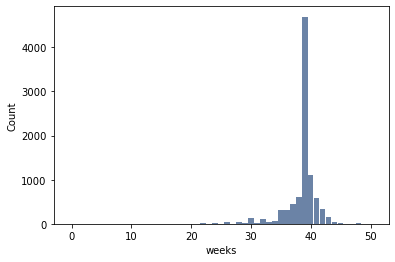

In [16]:
hist = thinkstats2.Hist(df_live['prglngth'])
thinkplot.Hist(hist)
thinkplot.Config(xlabel="weeks", ylabel="Count")

In [17]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [18]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


In [21]:
first_hist = thinkstats2.Hist(df_live.loc[df_live['birthord'] == 1]['prglngth'], label='first')
other_hist = thinkstats2.Hist(df_live.loc[df_live['birthord'] != 1]['prglngth'], label='other')

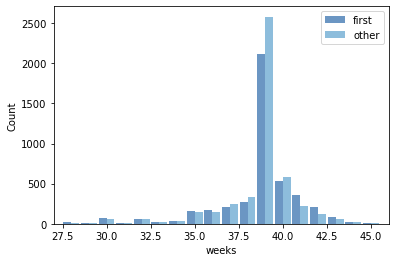

In [22]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [23]:
mean = df_live['prglngth'].mean()
std = df_live['prglngth'].std()

mean, std

(38.56055968517709, 2.702343810070593)

In [24]:
df_live.loc[df_live['birthord'] == 1]['prglngth'].mean(), df_live.loc[df_live['birthord'] == 1]['prglngth'].std()

(38.60095173351461, 2.7919014146686947)

In [25]:
df_live.loc[df_live['birthord'] != 1]['prglngth'].mean(), df_live.loc[df_live['birthord'] != 1]['prglngth'].std()

(38.52291446673706, 2.615852350439255)

In [26]:
def CohenEffectSize(group1, group2):
    """
    Computes Cohen's effect size for two groups
    (the difference in means expressed in number of standard deviations).
    
    `group1`:   Series or DataFrame
    `group2`:   Series or DataFrame
    
    returns:    float if the arguments are Series;
                Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    d = diff / np.sqrt(pooled_var)
    
    return d

In [27]:
CohenEffectSize(
    df_live.loc[df_live['birthord'] == 1]['prglngth'],
    df_live.loc[df_live['birthord'] != 1]['prglngth']
)

0.028879044654449883

## Exercises

In [28]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [29]:
df_resp = nsfg.ReadFemResp()

In [30]:
df_resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [31]:
df_resp['totincr'].head()

0     9
1    10
2     5
3    13
4     6
Name: totincr, dtype: int64

In [32]:
thinkstats2.Hist?

Init signature: thinkstats2.Hist(obj=None, label=None)
Docstring:     
Represents a histogram, which is a map from values to frequencies.

Values can be any hashable type; frequencies are integer counters.
Init docstring:
Initializes the distribution.

obj: Hist, Pmf, Cdf, Pdf, dict, pandas Series, list of pairs
label: string label
File:           ~/git/2022-summer-homeschool/thinkstats2/thinkstats2.py
Type:           type
Subclasses:     


In [35]:
thinkplot.Hist?

Signature: thinkplot.Hist(hist, **options)
Docstring:
Plots a Pmf or Hist with a bar plot.

The default width of the bars is based on the minimum difference
between values in the Hist.  If that's too small, you can override
it by providing a width keyword argument, in the same units
as the values.

Args:
  hist: Hist or Pmf object
  options: keyword args passed to plt.bar
File:      ~/git/2022-summer-homeschool/thinkstats2/thinkplot.py
Type:      function


In [33]:
income_code_map = {
    1: 0,
    2: 5000,
    3: 7500,
    4: 10000,
    5: 12500,
    6: 15000,
    7: 20000,
    8: 25000,
    9: 30000,
    10: 35000,
    11: 40000,
    12: 50000,
    13: 60000,
    14: 75000
}
    
incomes = df_resp['totincr'].map(lambda x: income_code_map[x])
incomes.head()

0    30000
1    35000
2    12500
3    60000
4    15000
Name: totincr, dtype: int64

In [45]:
bin_widths = []
for i in income_code_map:
    if i != 14:
        bin_widths.append(income_code_map[i + 1] - income_code_map[i] - 100)
    else:
        bin_widths.append(15000 - 100)

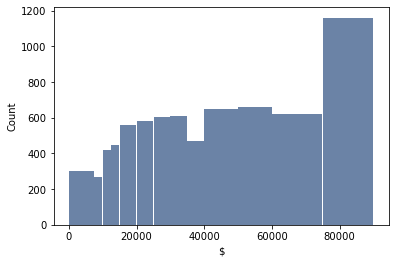

In [46]:
hist = thinkstats2.Hist(incomes)
thinkplot.Hist(hist, align='left', width=bin_widths)
thinkplot.Config(xlabel='$', ylabel='Count')

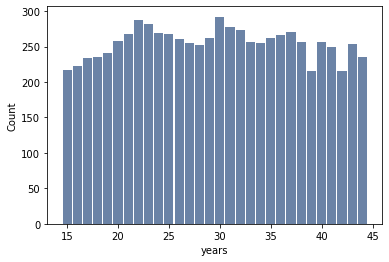

In [47]:
hist = thinkstats2.Hist(df_resp['age_r'])
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel="Count")

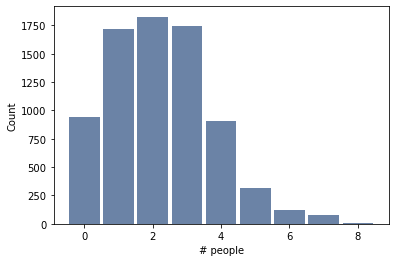

In [48]:
hist = thinkstats2.Hist(df_resp['numfmhh'])
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# people', ylabel="Count")

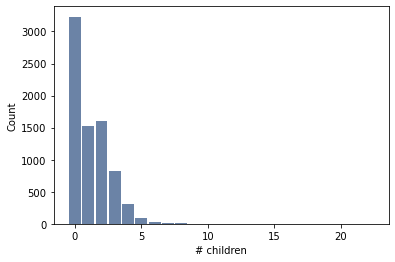

In [55]:
hist = thinkstats2.Hist(df_resp['parity'])
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# children', ylabel="Count")

This distribution is left-skewed.

In [56]:
for number, freq in hist.Largest(10):
    print(number, freq)

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

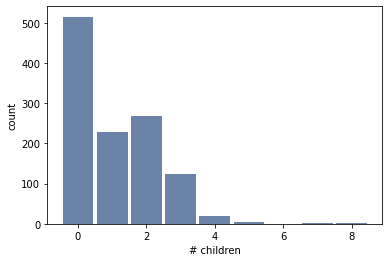

In [57]:
highest_income = df_resp.loc[df_resp['totincr'] == 14]
hist = thinkstats2.Hist(highest_income['parity'])
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# children', ylabel='count')

In [58]:
for number, freq in hist.Largest(10):
    print(number, freq)

8 1
7 1
5 5
4 19
3 123
2 267
1 229
0 515


In [59]:
not_highest_income = df_resp.loc[df_resp['totincr'] != 14]

highest_income['parity'].mean(), not_highest_income['parity'].mean()

(1.0758620689655172, 1.2495758136665125)

In [60]:
CohenEffectSize(
    highest_income['parity'],
    not_highest_income['parity']
)

-0.1251185531466061